In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [5]:
def vecinos8(img, x, y):
    h, w = img.shape[:2]
    vecinos = []

    for dy in [-1, 0, 1]:
        for dx in [-1, 0, 1]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < w and 0 <= ny < h:
                vecinos.append(img[ny, nx])
            else:
                vecinos.append(0)
    return np.array(vecinos).reshape(3, 3)

img = np.array(Image.open("images/kirkjufell.jpg").convert("L"))

print(vecinos8(img, 100, 100))


[[74 70 64]
 [76 80 78]
 [46 54 75]]


Vecinos8 (82, 29):
[[ 53  65 103]
 [ 50  63 105]
 [ 50  68 116]]

Vecinos8 (68, 27):
[[62 62 61]
 [62 63 59]
 [61 64 58]]

Vecinos8 (112, 89):
[[66 61 64]
 [66 59 63]
 [62 58 63]]

Vecinos8 (114, 89):
[[ 64  91 103]
 [ 63  86 106]
 [ 63  73  93]]

Vecinos8 (27, 130):
[[ 90 102  90]
 [ 97  93  82]
 [102  87  81]]



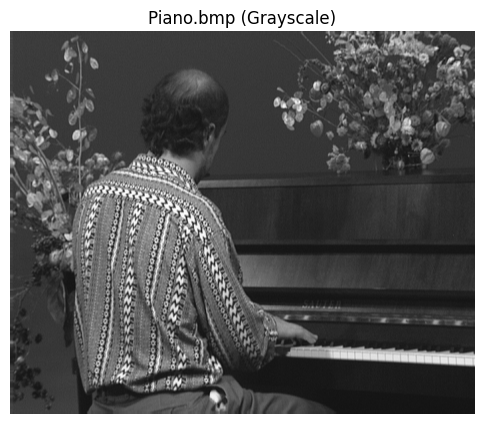

In [6]:
piano = np.array(Image.open("images/Piano.bmp").convert("L"))

coords = [(82,29), (68,27), (112,89), (114,89), (27,130)]

for c in coords:
    print(f"Vecinos8 {c}:\n{vecinos8(piano, c[0], c[1])}\n")

plt.figure(figsize=(6,6))
plt.imshow(piano, cmap="gray")
plt.title("Piano.bmp (Grayscale)")
plt.axis("off")
plt.show()

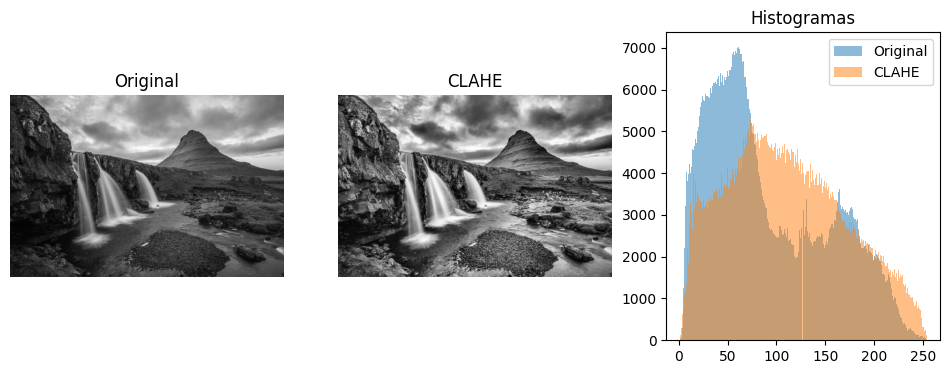

In [ ]:
img = np.array(Image.open("images/kirkjufell.jpg").convert("L"))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equalized = clahe.apply(img)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(equalized, cmap="gray")
plt.title("CLAHE")
plt.axis("off")

plt.subplot(1,3,3)
plt.hist(img.flatten(), bins=256, alpha=0.5, label="Original")
plt.hist(equalized.flatten(), bins=256, alpha=0.5, label="CLAHE")
plt.legend()
plt.title("Histograma Comparativo")
plt.show()

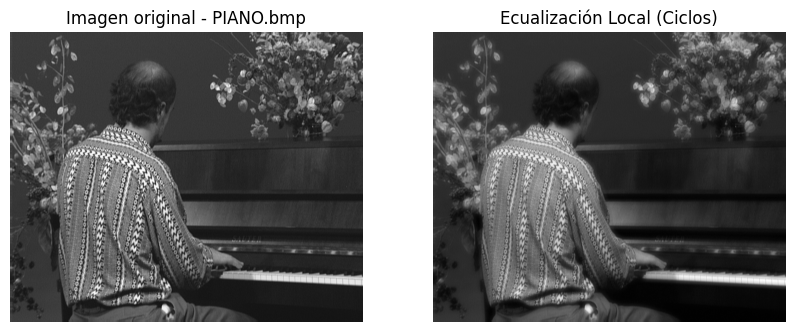

In [10]:
def local_eq_cycles(img, Amin=0.5, Amax=2.5, r=8):
    h, w = img.shape
    out = np.zeros_like(img, dtype=np.float32)

    for y in range(h):
        for x in range(w):
            y0, y1 = max(0, y-r), min(h, y+r)
            x0, x1 = max(0, x-r), min(w, x+r)
            region = img[y0:y1, x0:x1]

            m = np.mean(region)
            val = img[y, x]

            out[y, x] = np.clip(Amin * (val - m) + m, 0, 255)

    return out.astype(np.uint8)

piano = np.array(Image.open("images/PIANO.bmp").convert("L"))
local_eq_img = local_eq_cycles(piano)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(piano, cmap="gray")
plt.title("Imagen original - PIANO.bmp")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(local_eq_img, cmap="gray")
plt.title("Ecualización Local (Ciclos)")
plt.axis("off")
plt.show()

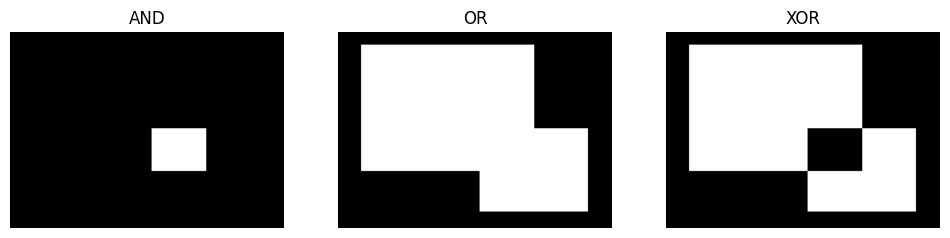

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

I1 = np.array(Image.open("images/CuadroBinGrande.pgm"))
I2 = np.array(Image.open("images/CuadroBinChico.pgm"))

AND = np.logical_and(I1, I2)
OR  = np.logical_or(I1, I2)
XOR = np.logical_xor(I1, I2)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(AND, cmap="gray")
plt.title("AND")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(OR, cmap="gray")
plt.title("OR")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(XOR, cmap="gray")
plt.title("XOR")
plt.axis("off")

plt.show()